In [1]:
%matplotlib inline

import json
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#pe13 = requests.get('http://172.31.2.68:16000/metrics').json()
#pe13.keys()

In [3]:
#pe12 = requests.get('http://172.31.4.193:16000/metrics').json()
#pe12.keys()

In [6]:
#with open('data/pe13.json', 'w') as f:
    #json.dump(pe13, f)
with open('data/pe13.json') as f:
    pe13 = json.load(f)

    
#with open('data/pe12.json', 'w') as f:
    #json.dump(pe12, f)
with open('data/pe12.json') as f:
    pe12 = json.load(f)

In [7]:
def collect(metrics, version):
    for command, timer in metrics['timers'].items():
        if command.startswith('com.adatao.pa.rest.CommandServlet'):
            record = {
                'version': version,
                'command': command.replace('com.adatao.pa.rest.CommandServlet.', '', 1)
            }
            for key in ('count', 'min', 'max', 'mean', 'p50', 'p95', 'stddev'):
                record[key] = timer[key]
            yield record
        
timers = list(collect(pe12, '1.4.12')) + list(collect(pe13, '1.4.13'))
print len(timers)
timers[0]

40


{'command': u'sql2liststring',
 'count': 26,
 'max': 1.459978953,
 'mean': 0.6419239087385477,
 'min': 0.049429158,
 'p50': 0.635644662,
 'p95': 0.921759871,
 'stddev': 0.1939808241150921,
 'version': '1.4.12'}

In [8]:
df = pd.DataFrame(timers)
df.head()

,command,count,max,mean,min,p50,p95,stddev,version
0,sql2liststring,26,1.459979,0.641924,0.049429,0.635645,0.921760,0.193981,1.4.12
1,setddfname,6,2.831179,2.830476,0.478575,2.831179,2.831179,0.038086,1.4.12
2,ddfnameexists,4,0.010038,0.006826,0.005438,0.006602,0.010038,0.001633,1.4.12
3,getauthenticateddatasources,12,0.002253,0.000779,0.000671,0.000750,0.000887,0.000065,1.4.12
4,listddf,4,0.021748,0.009903,0.009899,0.009899,0.009899,0.000064,1.4.12


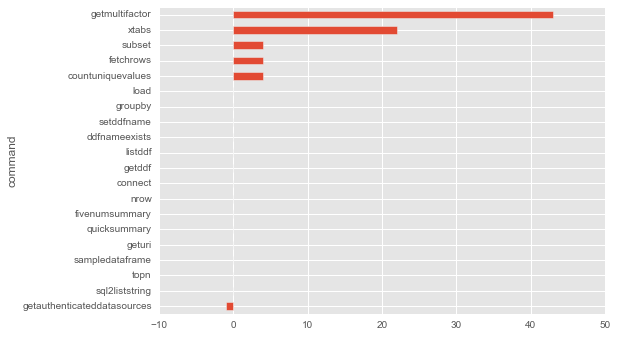

In [9]:
pe12_data = df[df.version == '1.4.12'].set_index('command')
pe13_data = df[df.version == '1.4.13'].set_index('command')

# difference in no. calls between 1.4.12 and 1.4.13
count_diff = pe13_data['count'] - pe12_data['count']
count_diff.sort_values().plot.barh()

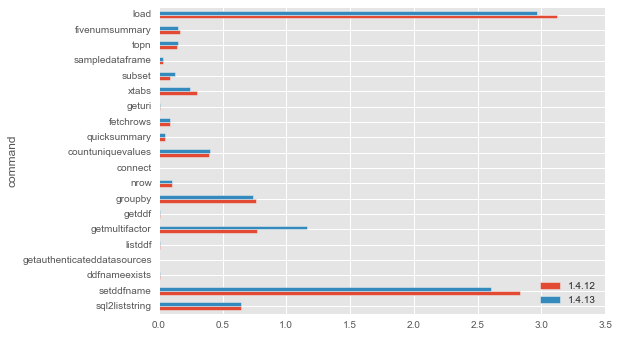

In [10]:
mean_compare = pd.concat([pe12_data['mean'], pe13_data['mean']], axis=1)
mean_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
mean_compare.plot.barh()

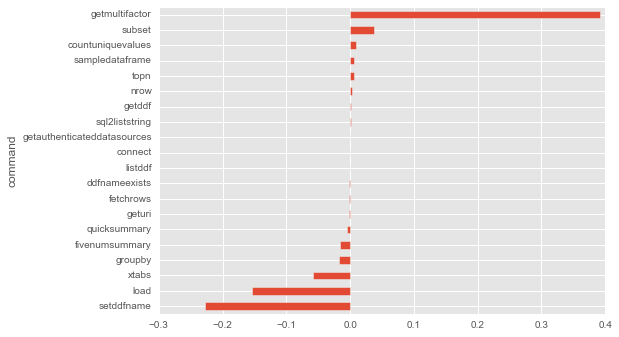

In [11]:
mean_diff = pe13_data['mean'] - pe12_data['mean']
mean_diff.sort_values().plot.barh()

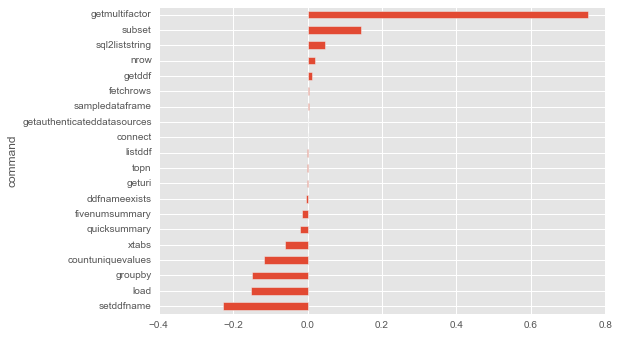

In [12]:
p95_diff = pe13_data['p95'] - pe12_data['p95']
p95_diff.sort_values().plot.barh()